In [72]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [10]:
with open('rfko_gain_dataframe.pickle', 'rb') as handle:
    df = pickle.load(handle)

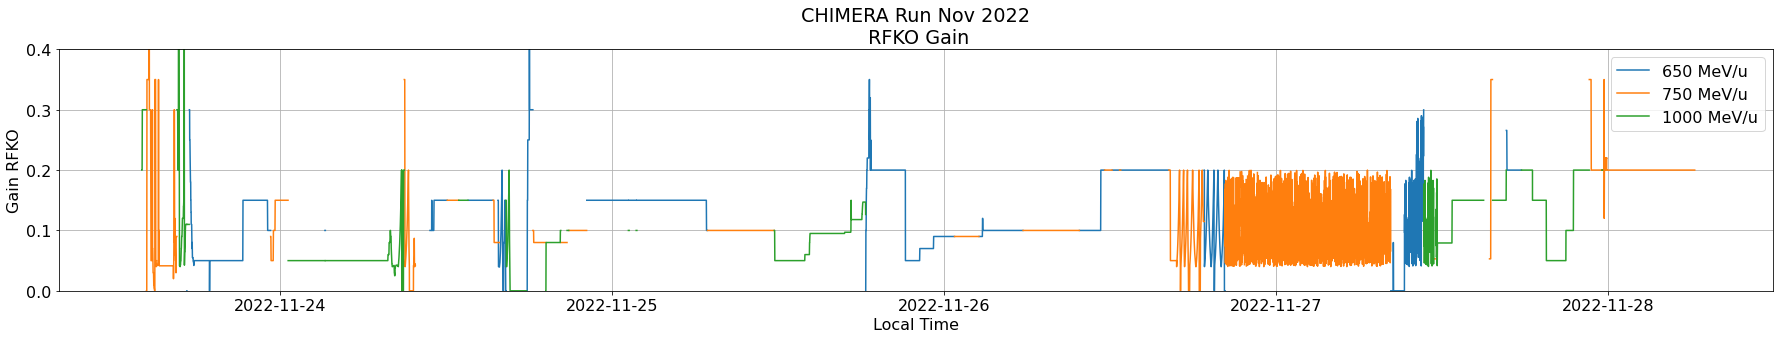

In [82]:
df.sort_values(by=["timestamp"], inplace=True)
fig, ax = plt.subplots(tight_layout=True, figsize=(25,5))
for energy in np.sort(df.energy.unique()):
    ax.plot(df.timestamp.where(df.energy==energy), df.gain.where(df.energy==energy), label=f"{energy} MeV/u")
ax.legend()
ax.set_xlabel("Local Time")
ax.set_ylabel("Gain RFKO")
ax.set_title("CHIMERA Run Nov 2022\n RFKO Gain")
ax.set_ylim(0, 0.4)
ax.grid()
plt.savefig("fig/chimera_rfko_gain.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

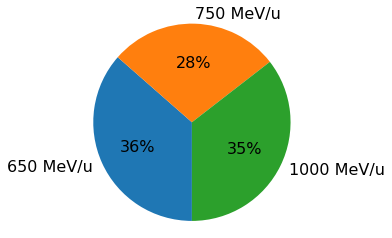

In [83]:
sizes = []
for energy in df.energy.unique():
    size = round(100*len(df.where(df.energy == energy).dropna())/len(df), 4)
    sizes.append(size)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '650 MeV/u', '750 MeV/u', '1000 MeV/u'
# sizes = [15, 30, 45, 10]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=-90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("fig/chimera_pie_chart.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')